**KMeans Clustering (Core)**

Task

Your task is to perform customer segmentation using KMeans. We are interested in grouping our customers into groups based on similar characteristics. This can help the company effectively allocate marketing resources. We will use customer age, education, years of employment, income, debt, whether they defaulted, and their debt-to-income ratio to group them into segments.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np
filename = '/content/drive/MyDrive/Week2_data/Machine Learning Data Sets/cust_seg.csv'
df = pd.read_csv(filename)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


Use KMeans to create various customer segments.

    Use an Elbow Plot of inertia.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

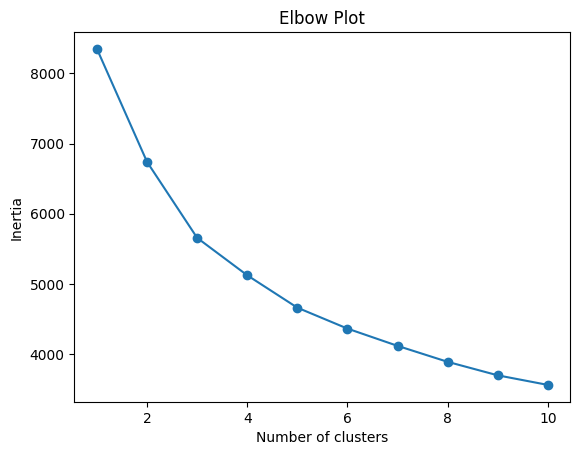

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

imputer = SimpleImputer(strategy="mean")
df_scaled = imputer.fit_transform(df_scaled)

# Calculate inertia for different numbers of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()


**And a plot of Silhouette Scores**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

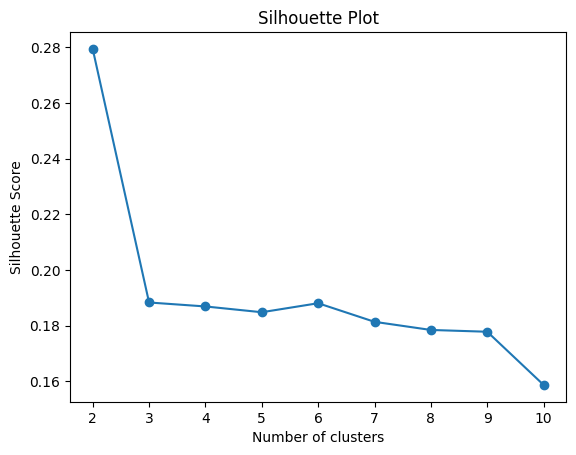

In [13]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Plot')
plt.show()

**Choose a K based on the results**

Based on the silhouette plot, the optimal number of clusters is the point where the silhouette scores start to decrease significantly. In this case, it appears to be around 3 clusters

Analyze the clusters you made in Part1.

Create analytical visualizations that explore statistics for each feature for each cluster.

In [14]:
import pandas as pd

# Convert the NumPy array to a DataFrame
df_scaled_df = pd.DataFrame(df_scaled)

# Create a DataFrame to store the descriptive statistics
cluster_stats = pd.DataFrame(columns=["Cluster", "Feature", "Statistic", "Value"])

# Loop through each cluster
for cluster_label in range(kmeans.n_clusters):
    # Select data points belonging to the current cluster
    cluster_data = df_scaled_df[kmeans.labels_ == cluster_label]

    # Calculate descriptive statistics for each feature
    for feature_index in range(df_scaled_df.shape[1]):
        feature_name = df_scaled_df.columns[feature_index]
        statistics = {
            "Cluster": cluster_label,
            "Feature": feature_name,
            "Statistic": "Mean",
            "Value": cluster_data[feature_name].mean(),
        }
        cluster_stats.loc[len(cluster_stats)] = statistics

        statistics = {
            "Cluster": cluster_label,
            "Feature": feature_name,
            "Statistic": "Standard deviation",
            "Value": cluster_data[feature_name].std(),
        }
        cluster_stats.loc[len(cluster_stats)] = statistics

        statistics = {
            "Cluster": cluster_label,
            "Feature": feature_name,
            "Statistic": "Minimum",
            "Value": cluster_data[feature_name].min(),
        }
        cluster_stats.loc[len(cluster_stats)] = statistics

        statistics = {
            "Cluster": cluster_label,
            "Feature": feature_name,
            "Statistic": "Maximum",
            "Value": cluster_data[feature_name].max(),
        }
        cluster_stats.loc[len(cluster_stats)] = statistics

        statistics = {
            "Cluster": cluster_label,
            "Feature": feature_name,
            "Statistic": "Median",
            "Value": cluster_data[feature_name].median(),
        }
        cluster_stats.loc[len(cluster_stats)] = statistics

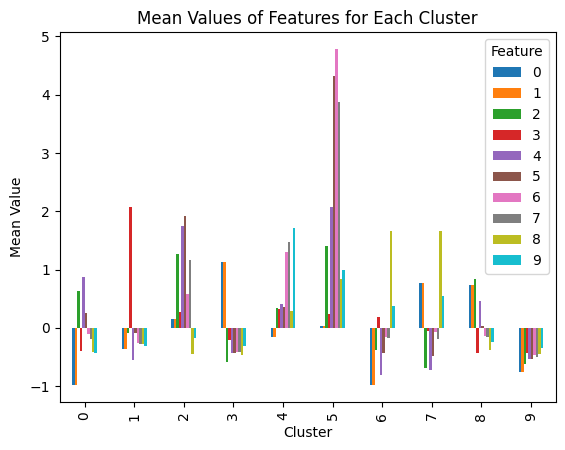

In [15]:
import matplotlib.pyplot as plt

# Group by cluster and feature, and calculate the mean value
cluster_means = cluster_stats[cluster_stats["Statistic"] == "Mean"].groupby(["Cluster", "Feature"])["Value"].mean().unstack()

# Create a bar chart
cluster_means.plot(kind="bar")
plt.xlabel("Cluster")
plt.ylabel("Mean Value")
plt.title("Mean Values of Features for Each Cluster")
plt.show()